# Ballfields in Pittsburgh

This notebook displays my process of finding which neighborhood in Pittsburgh has the most ballfields.

## Importing the Datasets

In [5]:
import pandas as pd
import geopandas as gd
from shapely.geometry import Point

ballfields = pd.read_csv("ballfields.csv", index_col = "field_name")
neighborhoods = pd.read_csv("neighborhoods.csv", index_col = "hood")

ballfields.head(5)

,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active
field_name,,,,,,,,,,,,,,,,
McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes
Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes
Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes
Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes
Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes


The first thing I did was import both the ballfields dataset and the neighborhood dataset. I then printed out the first five rows of each to see what data was contained in each.

In [6]:
neighborhoods.head(5)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
hood,,,,,,,,,,,,,,,,,,,,,
Point Breeze North,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
Squirrel Hill North,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823
Garfield,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,15,Ose Akinlotan,bf4065e7-c29c-48bd-b529-e7fd99077238,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,NaN,1.275116e+07,14577.441571
Bedford Dwellings,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,15,Ose Akinlotan,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:58:41,NaN,4.997845e+06,14216.959213
Knoxville,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,15,Thomas Scharff,8669d2f0-b886-4519-99d0-bb1015b592b0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:00:19,NaN,8.410563e+06,12003.269761


## Analyzing the Datasets

Next, I printed out the neighborhoods map and placed black dots on the map to indicate the ballfields.

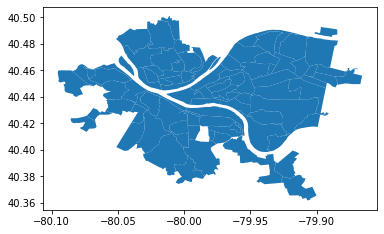

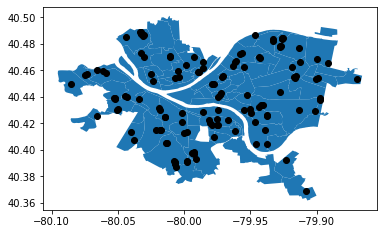

In [7]:
ballfields_map = gd.read_file("Ballfields_PGH.shp")
neighborhoods_map = gd.read_file("Neighborhoods_.shp")
neighborhoods_map.plot()

axis = neighborhoods_map.plot()
ballfields_map.plot(ax = axis, color = "black")

I noticed that the ballfields dataset did not contain a 'neighborhood' column. Therefore, I had to take the 'x' and 'y' column to get the coordinate of the ballfield and check if this coordinate was within the 'geometry' field of neighborhoods_map (the shape file of the neighborhoods dataset). However, to check this, I first had to turn the coordinate into a Point, so both items were a geometry data type. If the coordinate was found within a neighborhood, the neighborhood name was added to the appropriate row in the new 'neighborhood' column I appended to the ballfields dataset.

In [8]:
neighborhood_list = []
for index, row in ballfields.iterrows():
    field_coord = Point(ballfields['x'][index], ballfields['y'][index])
    nighborhood_found = False
    for index2, row2 in neighborhoods_map.iterrows():
        geometry = row2.geometry
        if(geometry.contains(field_coord)):
            neighborhood_list.append(row2['hood'])
            neighborhood_found = True
            break
    if not neighborhood_found:
        neighborhood_list.append('N/A')
ballfields['neighborhood'] = neighborhood_list
ballfields.head(5)

,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active,neighborhood
field_name,,,,,,,,,,,,,,,,,
McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes,Lincoln Place
Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes,Overbrook
Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes,Brookline
Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes,Brookline
Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes,Brookline


I created an empty dictionary at the start of the code. I then iterated throughout the rows in the ballfields dataset and if the neighborhood was not in the dictionary, then I inserted it and gave it a value of 1. If the neighborhood was in the dictionary, then I just added a value of one to it. I turned this into a DataFrame called 'fields'.

In [1]:
fields_dict = {}
for index, row in ballfields.iterrows():
    hood = row['neighborhood']
    if hood in fields_dict:
        fields_dict[hood] += 1
    else:
        fields_dict[hood] = 1

fields = pd.DataFrame.from_dict(fields_dict, orient='index', columns=['num_fields'])
fields.index.name = 'neighborhood'
fields = fields.sort_values(by='num_fields', ascending=False)
fields(.5)

NameError: name 'ballfields' is not defined

## Data Visualization

I turned this DataFrame into a bar graph. At first I plotted every neighborhood, but this was crowded, so I decided to just graphed the top 20.

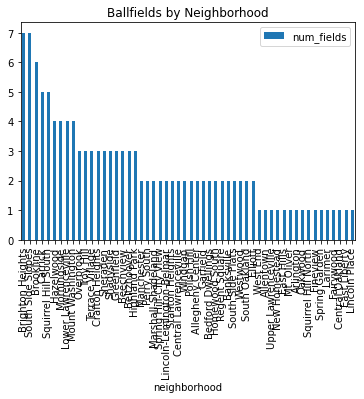

In [46]:
plot = fields.iloc[0:len(fields)].plot(kind = 'bar', title = 'Ballfields by Neighborhood')

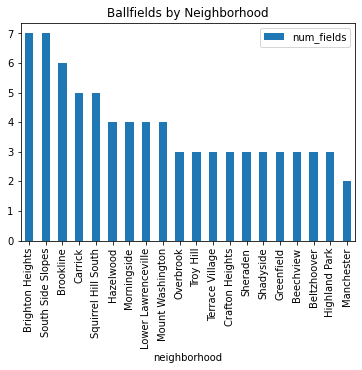

In [53]:
plot = fields.iloc[0:20].plot(kind = 'bar', title = 'Ballfields by Neighborhood')

Lastly, I took the fields DataFrame and turned it into a colored map where gray means there are no ballfields, and the colors on the map match the key on the right, with the darkest red portraying the neighborhood with the most ballfields.

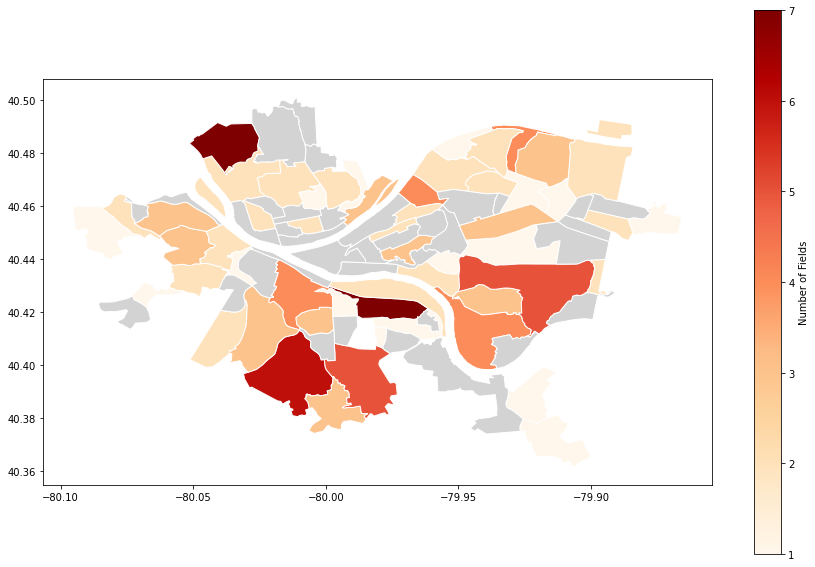

In [37]:
merged = neighborhoods_map.merge(fields, how='left', left_on='hood', right_on='neighborhood')
ballfields_map = gd.GeoDataFrame(merged, geometry='geometry')
ballfields_map.plot(column='num_fields', 
               cmap='OrRd',              
               edgecolor="white",     
               legend=True,         
               legend_kwds={'label': "Number of Fields"},
               figsize=(15, 10),     
               missing_kwds={"color": "lightgrey"} 
               )

## Conclusion

The neighborhood with the most ballfields is a tie between Brighton Heights and South Side Slopes, with both of them containing seven ballfields. The runner-up is Brookline with six ballfields. It was a confusing process figuring out to analyze this data, but once I added the neighborhood column to the ballfields data set, it was very easy to visualize these findings. Ballfields are a great way to get some outdoor exercise in. As the weather gets nicer, it's important to note that Brighton Heights and South Side Slopes are the best neighborhoods for getting active outside. 